# Diabetes  Prediction Project

Welcome to the Diabetes Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict diabetes.


## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 📥 Step 1: Load the Dataset

In [57]:
df = pd.read_csv("diabetes_dataset.csv");

## 🔍 Step 2: Explore the Dataset

In [58]:
df.sample(10)

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
590,590,31,Male,White,28.6,84.7,117.7,4.6,105,68,...,55.1,185.0,34.2,5.4,Moderate,2863,NaN,Never,1,0
4941,4941,66,Female,Hispanic,20.2,75.2,107.8,5.5,174,93,...,54.8,177.6,63.3,6.1,High,1763,Heavy,Current,0,0
7175,7175,65,Female,Black,31.9,112.5,74.2,12.7,176,74,...,70.2,132.9,68.7,6.6,High,2297,Heavy,Former,0,1
8453,8453,51,Male,Asian,20.8,108.5,143.4,10.1,175,67,...,68.5,166.6,51.3,4.2,Moderate,2743,Moderate,Former,1,1
3806,3806,63,Male,Black,36.5,71.0,190.0,13.7,163,115,...,59.9,178.1,85.1,5.6,Low,3061,NaN,Never,0,0
2812,2812,47,Male,White,39.9,73.9,94.8,14.0,143,116,...,30.8,147.2,83.9,6.5,High,1575,Moderate,Former,1,1
8942,8942,37,Female,Black,19.7,80.8,127.4,7.1,123,102,...,60.7,186.4,63.0,7.6,High,3173,NaN,Never,1,1
1445,1445,46,Male,Hispanic,24.1,95.7,125.7,12.7,165,60,...,70.9,88.1,36.3,4.1,Moderate,3537,NaN,Never,0,0
6125,6125,30,Female,Asian,32.1,91.1,130.2,11.8,172,99,...,67.7,90.2,95.5,5.9,High,1949,NaN,Never,0,0
2059,2059,52,Male,White,21.7,84.2,105.1,5.6,167,77,...,73.8,115.9,82.2,4.9,Low,2520,NaN,Current,1,0


In [59]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [60]:
df.shape

(10000, 21)

In [61]:
df.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,object
Ethnicity,object
BMI,float64
Waist_Circumference,float64
Fasting_Blood_Glucose,float64
HbA1c,float64
Blood_Pressure_Systolic,int64
Blood_Pressure_Diastolic,int64


In [62]:
df.isna().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
Ethnicity,0
BMI,0
Waist_Circumference,0
Fasting_Blood_Glucose,0
HbA1c,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0


## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [63]:
df['Alcohol_Consumption'].value_counts()

,count
Alcohol_Consumption,
Moderate,3373
Heavy,3307


In [64]:
df['Alcohol_Consumption'].fillna('None', inplace=True)


/tmp/ipython-input-64-265032131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol_Consumption'].fillna('None', inplace=True)


In [65]:
df['Sex'].replace({'Female': 0 , 'Male': 1} , inplace=True)

/tmp/ipython-input-65-2302001257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'Female': 0 , 'Male': 1} , inplace=True)
/tmp/ipython-input-65-2302001257.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace({'Female': 0 , 'Male': 1} , inplace=True)


In [66]:
df= pd.get_dummies(df, columns=[
                  'Ethnicity',
                  'Physical_Activity_Level',
                  'Smoking_Status',
                  'Alcohol_Consumption'],
                   drop_first=True)

In [67]:
df.replace({True: 1 , False: 0 } , inplace=True)

/tmp/ipython-input-67-3547872301.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1 , False: 0 } , inplace=True)


In [68]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [69]:
df['Diabetes_Diagnosis'] = ((df['Fasting_Blood_Glucose'] >= 126) | (df['HbA1c'] >= 6.5)).astype(int)


In [70]:
df.sample(10)

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,...,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Smoking_Status_Former,Smoking_Status_Never,Alcohol_Consumption_Moderate,Alcohol_Consumption_None,Diabetes_Diagnosis
7367,49,1,31.9,88.1,129.6,14.8,131,72,271.9,48.1,...,1,0,0,1,0,0,0,1,0,1
8187,58,1,27.7,117.7,159.9,11.0,114,60,239.8,33.1,...,0,0,0,0,1,1,0,0,0,1
6593,33,0,34.9,102.4,94.7,9.5,133,112,225.6,76.0,...,0,0,1,0,1,0,0,1,0,1
6776,66,0,29.1,105.4,109.6,5.7,104,96,214.0,78.8,...,0,1,0,1,0,1,0,1,0,0
5678,66,1,26.5,72.6,114.7,12.5,139,92,200.9,44.5,...,1,0,0,0,1,1,0,0,1,1
5976,69,1,20.2,98.1,106.7,7.2,94,61,250.5,30.5,...,0,0,0,0,1,0,0,1,0,1
8417,58,0,24.5,107.5,76.3,14.6,112,85,250.0,31.7,...,0,1,0,0,0,1,0,0,0,1
1538,37,0,19.5,96.4,95.9,8.0,129,70,190.5,62.3,...,0,0,0,0,1,0,0,0,0,1
4015,69,1,21.7,90.3,79.3,10.8,154,90,164.9,66.6,...,0,0,0,0,0,0,0,0,1,1
2640,44,1,25.8,94.8,93.2,5.6,130,84,203.6,61.6,...,0,1,0,0,1,0,1,1,0,0


## 📊 Step 4: Visualize the Data

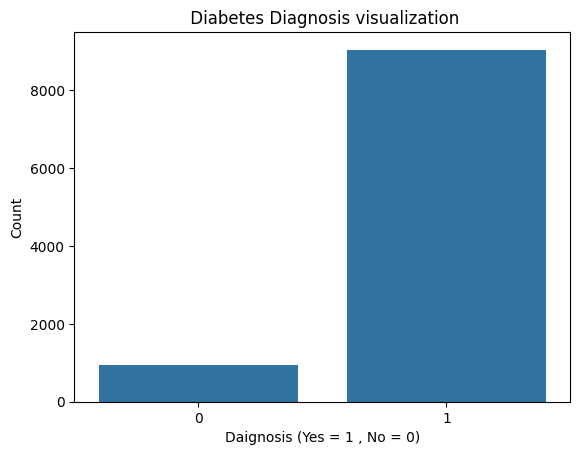

In [71]:
sns.countplot(x='Diabetes_Diagnosis', data=df)
plt.title(" Diabetes Diagnosis visualization")
plt.xlabel("Daignosis (Yes = 1 , No = 0)")
plt.ylabel("Count")
plt.show()

## ⚙️ Step 5: Preprocess the Data

In [72]:

X= df.drop('Diabetes_Diagnosis', axis=1)
y=df['Diabetes_Diagnosis']




In [73]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

## 🤖 Step 6: Train a Machine Learning Model

In [74]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)

X_train_sm , y_train_sm = smote.fit_resample(X_train, y_train)


In [75]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_sm)
X_test_scaled=scaler.transform(X_test)


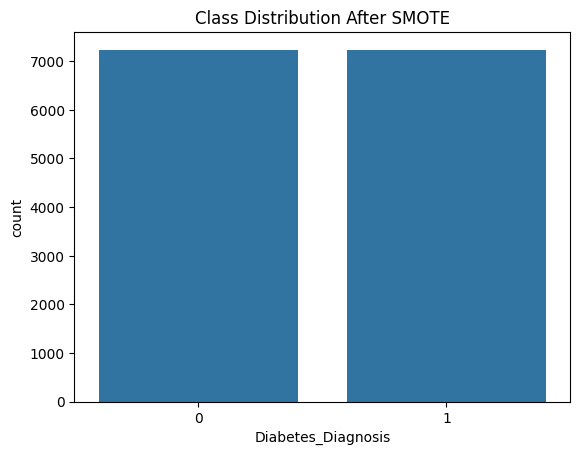

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.show()


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

model= Sequential ([

              Dense(32 , activation='relu', input_shape=(X_train_scaled.shape[1],)),
              Dropout(0.3),
              Dense(16, activation ='relu'),
              Dropout(0.3),
              Dense(1, activation='sigmoid')


]
)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


y_pred = model.fit(X_train_scaled, y_train_sm , validation_data=(X_test_scaled , y_test),epochs=40 , batch_size=32)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7573 - loss: 0.4792 - val_accuracy: 0.9090 - val_loss: 0.2088
Epoch 2/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9436 - loss: 0.1452 - val_accuracy: 0.9330 - val_loss: 0.1539
Epoch 3/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9560 - loss: 0.1115 - val_accuracy: 0.9520 - val_loss: 0.1225
Epoch 4/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9707 - loss: 0.0823 - val_accuracy: 0.9605 - val_loss: 0.1034
Epoch 5/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9751 - loss: 0.0695 - val_accuracy: 0.9660 - val_loss: 0.0965
Epoch 6/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9756 - loss: 0.0699 - val_accuracy: 0.9695 - val_loss: 0.0825
Epoch 7/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9778 - loss: 0.0579 - val_accuracy: 0.9740 - val_loss: 0.0692
Epoch 8/40
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0419 - val_accuracy: 0.9765 - val_

## 🧪 Step 7: Evaluate the Model

In [85]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0250
Test Accuracy: 0.9905


In [86]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       191
           1       0.99      1.00      0.99      1809

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000



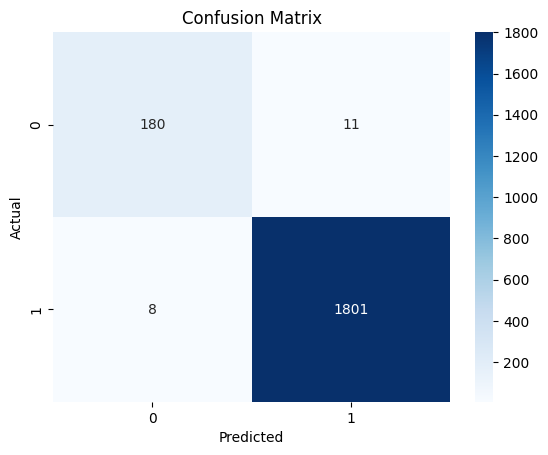

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy